In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.optimize import minimize_scalar

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score


In [4]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\data science assighnments\Recommendation System\Recommendation System\anime.csv')

In [5]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [7]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [8]:
# Unique entries in key columns
print(df['genre'].unique())
print(df['type'].unique())


['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']
['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]


In [13]:
# Drop or impute missing values
df['type'].fillna('Unknown', inplace=True)
df['genre'].fillna('Unknown', inplace=True)
df['rating'].fillna(df['rating'].mean(), inplace=True)


In [14]:
# Drop duplicates if necessary
df.drop_duplicates(inplace=True)



In [15]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

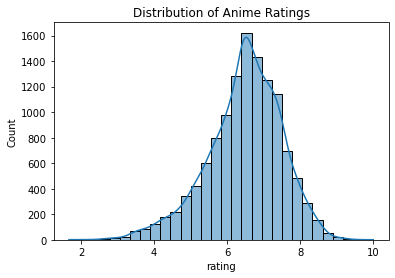

In [17]:
# Distribution of anime ratings
sns.histplot(df['rating'], kde=True, bins=30)
plt.title('Distribution of Anime Ratings')
plt.show()


In [58]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()


In [59]:
df['type_encoded'] = label_encoder.fit_transform(df['type'])
genre_encoded = df['genre'].str.get_dummies(sep=', ')
print(genre_encoded)

       Action  Adventure  Cars  Comedy  Dementia  Demons  Drama  Ecchi  \
0           0          0     0       0         0       0      1      0   
1           1          1     0       0         0       0      1      0   
2           1          0     0       1         0       0      0      0   
3           0          0     0       0         0       0      0      0   
4           1          0     0       1         0       0      0      0   
...       ...        ...   ...     ...       ...     ...    ...    ...   
12289       0          0     0       0         0       0      0      0   
12290       0          0     0       0         0       0      0      0   
12291       0          0     0       0         0       0      0      0   
12292       0          0     0       0         0       0      0      0   
12293       0          0     0       0         0       0      0      0   

       Fantasy  Game  ...  Slice of Life  Space  Sports  Super Power  \
0            0     0  ...              

In [60]:

scaler = MinMaxScaler()
df['normalized_rating'] = scaler.fit_transform(df[['rating']])


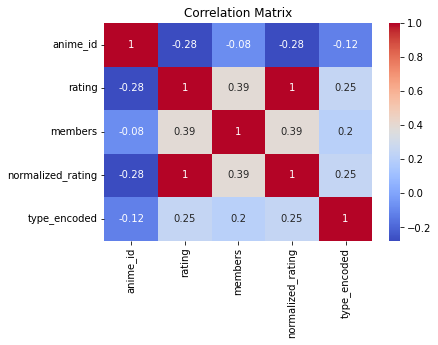

In [62]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [64]:
# Apply PCA on encoded genres
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(genre_encoded)
print(reduced_features)

[[-0.2269295  -0.39180091]
 [ 1.26773969  0.50304117]
 [ 0.53057801  0.9776309 ]
 ...
 [-0.15103669 -0.70528434]
 [-0.15103669 -0.70528434]
 [-0.15103669 -0.70528434]]


In [70]:
filtered_data = df[df['rating'] > 0]



In [81]:
# Feature selection: 'rating' and 'members' as features
X = df[['rating', 'members']]  # Independent features
y = df['rating']  # Dependent feature (rating to predict)


In [82]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [85]:
# Initialize the model (RandomForestRegressor here)
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [86]:
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [87]:

# Make predictions on the test data
y_pred = model.predict(X_test)


In [88]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.003307747815050358


In [89]:
# Step 1: Apply a threshold for recommendation (e.g., ratings above 8 are recommended)
threshold = 8.0
y_pred_binary = (y_pred >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)


In [90]:

# Step 2: Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)


In [91]:
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [92]:
# Reshape to vectors (for cosine similarity)
y_pred_vector = y_pred.reshape(1, -1)
y_test_vector = y_test.values.reshape(1, -1)


In [93]:
cos_sim = cosine_similarity(y_pred_vector, y_test_vector)
print("Cosine Similarity:", cos_sim[0][0])

Cosine Similarity: 0.999999873390381


Interview Questions:-
1. User-based collaborative filtering recommends items to a user based on the preferences of similar users.
   The system identifies users who are similar to the target user, typically using metrics like cosine similarity, Pearson        correlation, or Jaccard similarity.
   It assumes that users who have similar tastes in the past will have similar preferences in the future.
   Recommendations are made by suggesting items that similar users have liked but the target user has not yet interacted with.

   Item-based collaborative filtering recommends items based on the similarity between items, rather than users.
   The system calculates how similar items are to each other based on the ratings from users.
   It assumes that if a user likes an item, they will also like other items that are similar to it.
   Recommendations are made by suggesting items that are similar to the ones the target user has already interacted with.   
   
2. Collaborative Filtering is a popular technique used in recommendation systems. It is based on the idea that users who have      similar preferences in the past will continue to have similar preferences in the future. The core idea of collaborative        filtering is to make recommendations by leveraging the collective behavior (ratings, interactions, etc.) of a large number      of users.  


    Step 1: Calculate Similarity Between Users (for User-Based Collaborative Filtering)

    We calculate the similarity between User A and other users based on their ratings using a similarity measure (e.g., Cosine      Similarity).
    Step 2: Identify Similar Users

    For instance, User A and User B may be similar because they have rated movies in a similar way.
    Step 3: Recommend Movies Based on Similar Users' Preferences

    Since User A and User B are similar, the system can recommend "Inception" or "Avatar" to User A, because User B liked these     movies.
    For Item-Based Collaborative Filtering:

    The system would instead look for similarities between movies.
    For example, if User A liked "Matrix", the system would recommend movies that are similar to "Matrix", such as "Inception"     or "Avatar".
  